Importing necessary Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

importing dataset

In [ ]:
dataset = pd.read_csv("4K_House_Rent_Dataset.csv")
dataset.head()

Linear Regression Parameters and Cost Tracking

In [65]:
X = dataset['Size']
Y = dataset['Rent']
thetas_0 = []
thetas_1 = []
costs = []

In [66]:
m = len(X)
epoch = 50
learning_rate = 0.0000001
theta_0 = 0
theta_1 = 0

Gradient Descent

In [67]:
for i in range(epoch):
  temp_0 = 0
  temp_1 = 0
  for j in range(m):
    temp_0 += (theta_0 + theta_1*X[j] - Y[j])
    temp_1 += (theta_0 + theta_1*X[j] - Y[j]) * X[j]

  theta_0 = theta_0 - learning_rate * (temp_0) / m
  theta_1 = theta_1 - learning_rate * (temp_1) / m
  thetas_0.append(theta_0)
  thetas_1.append(theta_1)
  sum = 0
  for k in range(m):
    sum_ = (theta_0 + theta_1*X[k] - Y[k]) * ((theta_0 + theta_1*X[k] - Y[k]))
  cost = sum_ / (2 * m)
  costs.append(cost)

max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x, max_x, 1000)
y = theta_1 * x + theta_0

Plotting the dataset with its regression line

0.007875489017113636 40.574629044978444


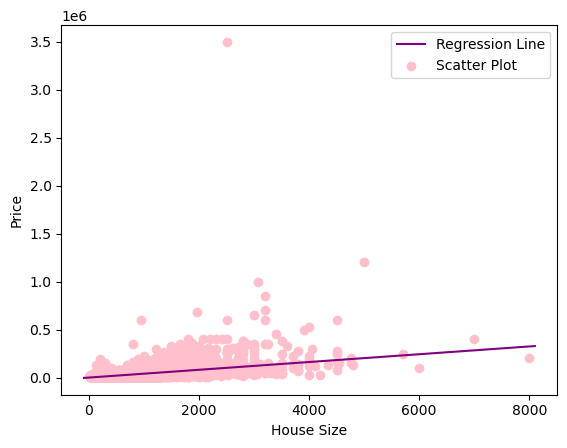

In [68]:
plt.plot(x, y, color='purple', label='Regression Line')
plt.scatter(X, Y, color = "pink", label = 'Scatter Plot')

# print(theta_0, theta_1)

plt.xlabel('House Size')
plt.ylabel('Price')
plt.legend()
plt.show()

Defining the loss function

In [69]:
def loss(a, b):
    return 1/len(X)*(np.sum((a*X + b - Y)**2))

Contour Plot

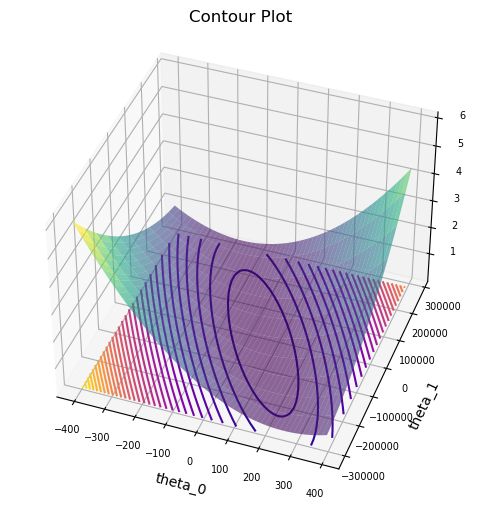

In [70]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 2, 1, projection="3d")

a = np.arange(-400, 400, 5)
b = np.arange(-300000, 300000, 20000)
A, B = np.meshgrid(a, b)

zs = np.array([loss(a, b) for a, b in zip(np.ravel(A), np.ravel(B))])
loss_vals = zs.reshape(A.shape)

surf = ax.plot_surface(A, B, loss_vals, cmap="viridis", rstride=3, cstride=3, edgecolor='none', alpha=0.6)

contour = ax.contour(A, B, loss_vals, 30, cmap="plasma", offset=0)

ax.view_init(40, 290)

ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_title('Contour Plot')

plt.tick_params(axis='both', which='major', labelsize=7)


plt.show()